In [181]:
from pgmpy.models import MarkovModel, BayesianModel
from pgmpy.factors import Factor
from pgmpy.readwrite import XMLBIFWriter
from pgmpy.inference import BeliefPropagation
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
esp_eligible_products = ['Money Market Bonus','Collateral MMA',
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

In [6]:
from pgmpy.factors import JointProbabilityDistribution as Joint

In [4]:
 checking_prob = np.poly1d([ -1.25712688e-07,  -2.44667686e-04,   9.74145030e-01])

In [722]:
t = np.poly1d([  2.59374752e-07 , -1.88617729e-04 ,  6.49014381e-02] )

In [848]:
## define a probability distribution over each pair of varaibles
def ESP_Joint_Product_Probabilities(week_n):
    """Returns the conditions probabilities of money market and every other ESP product.
    Joint probability are from 2013-2016 GP with L10 desc data.
    
    Returns a dictionary of each probabilitiy distribution given the time.
    
    Takes inputs as weeks. need to convert to days interally in the function"""
    days = week_n*7

    
    # find the probabilities given a month number for money market bonus
 

    mmb1_cmma1 = np.poly1d([  2.70684967e-07 , -2.05140309e-04  , 7.20355012e-02] )
    mmb1_cmma0 = np.poly1d([  5.11203255e-07  ,-3.93504162e-04 ,  8.65187565e-02] )
    mmb0_cmma1 = np.poly1d([  8.93640080e-08 , -2.73628077e-05  , 3.08964000e-02] )
    mmb0_cmma0 = np.poly1d([  2.06505437e-10 , -2.07589605e-07  , 5.47570588e-05 ,  3.26202229e-02]  )

    mmb1_cm1 = np.poly1d([  3.05658516e-10 , -4.16908301e-07,   2.19973221e-04 ,  9.61539864e-03] )
    mmb1_cm0 = np.poly1d([  1.25156157e-07 , -5.13406963e-05  , 3.73298790e-02])
    mmb0_cm1 = np.poly1d([  9.69383263e-08 , -3.28438149e-05 ,  3.00073625e-02] )
    mmb0_cm0 = np.poly1d([  1.39044113e-07 ,-5.94579012e-05  , 3.81549237e-02]  )

    mmb1_fx1 = np.poly1d( [  4.41114775e-07  ,-4.20398500e-04,   1.16137062e-01]  )
    mmb1_fx0 = np.poly1d([  1.44750265e-07 , -8.48382013e-05 ,  3.81870969e-02] )
    mmb0_fx1 = np.poly1d([  1.29548781e-07 , -7.11314558e-05  , 3.28901347e-02] )
    mmb0_fx0 = np.poly1d([  1.40793383e-07 , -7.44997798e-05 ,  3.63716660e-02] )

    mmb1_loc1 = np.poly1d([ 0.00010659, -0.01651691] )
    mmb1_loc0 = np.poly1d([  9.94784572e-05  ,-5.29243826e-03]  )
    mmb0_loc1 = np.poly1d([  2.92320532e-05 ,  2.15732110e-02] )
    mmb0_loc0 = np.poly1d([  7.35456792e-08  , 3.22622572e-06  , 2.48340085e-02] )
    
    mmb1_es1 = np.poly1d([  9.79179700e-08  ,-1.94960719e-05 ,  2.01947821e-02])
    mmb1_es0 = np.poly1d([  1.25628587e-07 , -4.47767703e-05  , 3.27668970e-02])
    mmb0_es1 = np.poly1d([ 0.00014991, -0.04817441])
    mmb0_es0 = np.poly1d([  2.59036973e-05 ,  2.45175690e-02] )

    mmb1_checking1 = np.poly1d([  6.49902941e-10  ,-1.10568473e-06 ,  5.92170334e-04 , -8.34084886e-03])
    mmb1_checking0 = np.poly1d([  6.93577473e-05,  1.03343043e-02] )
    mmb0_checking1 = np.poly1d([  1.55819102e-07 , -1.27149531e-04 ,  6.26752001e-02]  )
    mmb0_checking0 = np.poly1d([  5.94479646e-06  , 2.01426488e-02] )
    
    ## Collatral CMMA
    cmma1_cm1 = np.poly1d([  1.74621063e-07  ,-5.44171974e-05  , 1.45753768e-01]  ) # done
    cmma1_cm0 = np.poly1d([  2.25396742e-07,  -1.82287488e-04 ,  6.92818305e-02]  )# done 
    cmma0_cm1 = np.poly1d([  3.03369281e-08  ,-1.41113270e-05,   3.71766593e-02] )
    cmma0_cm0 = np.poly1d([  3.25294795e-07  ,-3.48842397e-04 ,  1.42016815e-01]  ) # done
    
    cmma1_fx1 = np.poly1d([  3.06569322e-07 , -2.11982644e-04,   8.15093761e-02])
    cmma1_fx0 = np.poly1d([  1.28605301e-07 , -6.04282161e-05,   4.82462616e-02])
    cmma0_fx1 = np.poly1d([  3.03189980e-07 , -2.37790868e-04,   6.67285624e-02])
    cmma0_fx0 = np.poly1d([  1.85981610e-07  ,-1.58033746e-04 ,  7.02289641e-02] )

    
    cmma1_loc1 = np.poly1d([  3.67579683e-07 , -3.12304992e-04,   8.26883352e-02])
    cmma1_loc0 = np.poly1d([  1.17932213e-07,  -3.48415893e-05 ,  3.02641802e-02] )
    cmma0_loc1 = np.poly1d([ 0.00010498 ,-0.02384952])
    cmma0_loc0 = np.poly1d([  8.37258965e-08 , -1.83904108e-05 ,  3.32755978e-02] )
    
    cmma1_es1 = np.poly1d([  1.47707023e-07,  -8.22711316e-05 ,  4.24696448e-02] )
    cmma1_es0 = np.poly1d([  6.83197487e-11 , -5.75116564e-08 ,  3.21772794e-05 ,  2.42777081e-02] )
    cmma0_es1 = np.poly1d([  9.39667586e-08 , -2.43586448e-05 ,  3.14199019e-02] )
    cmma0_es0 = np.poly1d([  2.39430274e-10,  -1.44324241e-07 ,  3.01094062e-05 ,  2.84118888e-02] )
    
    cmma1_checking1 = np.poly1d([  4.80817975e-10 , -8.68739693e-07,  5.38414731e-04  , 1.02754131e-01]  )
    cmma1_checking0 = np.poly1d([  2.53481141e-05 ,  1.44230769e-02] )
    cmma0_checking1 = np.poly1d([  3.42775485e-07  ,-3.79634995e-04  , 1.58929486e-01]   )
    cmma0_checking0 = np.poly1d([  1.06519355e-07,  -5.84401748e-05 ,  3.37941011e-02]  )
    # Cash Management  HERE
    cm1_fx1 = np.poly1d([  3.16937519e-07 , -2.32888433e-04 ,  8.80105415e-02]  )
    cm1_fx0 = np.poly1d([  1.20252327e-07 , -5.33114760e-05 ,  4.04515569e-02]   )
    cm0_fx1 = np.poly1d([  2.45151748e-07 , -1.66459541e-04 ,  5.53943882e-02] )
    cm0_fx0 = np.poly1d([  1.91242453e-07,  -1.70410462e-04   ,7.67043023e-02]  )
    
    cm1_loc1 = np.poly1d([  5.74909371e-07 , -6.19333952e-04,  1.88663127e-01] )
    cm1_loc0 = np.poly1d([  1.92172955e-07 , -7.08769920e-05 ,  3.19232652e-02] )
    cm0_loc1 = np.poly1d([  8.52798460e-08 , -6.86493735e-06 ,  2.61767739e-02])
    cm0_loc0 = np.poly1d([  8.54251870e-09 ,  1.38159473e-05 ,  2.80300113e-02] )
    
    cm1_es1 = np.poly1d([  2.41465194e-07  ,-5.28928559e-05 , 1.58984405e-01]  )
    cm1_es0 = np.poly1d([  4.11778698e-08,  -5.08873658e-06  , 2.67537373e-02] )
    cm0_es1 = np.poly1d([  1.78124468e-07 , -5.96795076e-05 ,  3.30512228e-02] )
    cm0_es0 = np.poly1d([  1.97463887e-05 ,  2.53395438e-02] )
    
    cm1_checking1 = np.poly1d([  4.88168425e-10  ,-9.73584945e-07  , 6.90420415e-04  , 5.78464721e-02] )
    cm1_checking0 = np.poly1d([  7.91828332e-05 ,  5.78034682e-03] )
    cm0_checking1 = np.poly1d([ -5.94945412e-11 ,  5.33561816e-07 , -5.50659356e-04 ,  2.02678397e-01] )
    cm0_checking0 = np.poly1d([ -2.22927221e-11 ,  1.39906570e-07 , -7.18449661e-05  , 3.40807093e-02])
    # FX Product 
    fx1_loc1  = np.poly1d([  6.05644457e-07 , -7.14065839e-04  , 2.18561936e-01] )
    fx1_loc0 = np.poly1d([  5.45458203e-08 , -5.84656236e-06 ,  2.60382815e-02] )
    fx0_loc1 = np.poly1d( [  1.95556200e-07  ,-1.34253375e-04,   5.08936481e-02])
    fx0_loc0 = np.poly1d([  1.13848400e-07  ,-2.68635422e-05 ,  2.84518082e-02])

    fx1_es1 = np.poly1d([  1.08012209e-07,  -4.39865495e-05,   2.77159470e-02] )
    fx1_es0 = np.poly1d([  4.99543690e-07,  -3.86823829e-04 ,  7.22661292e-02] )
    fx0_es1 = np.poly1d([  3.85525982e-08  , 5.50808216e-06 ,  2.49361208e-02])
    fx0_es0 = np.poly1d([  1.66753881e-07,  -8.50479045e-05 ,  3.27874978e-02])

    fx1_checking1 = np.poly1d([  7.11530103e-08  , 1.27819993e-04  , 1.03840618e-01]  )
    fx1_checking0 = np.poly1d([ 0.00057208 , 0.01086957] )
    fx0_checking1 = np.poly1d([  2.87933932e-07 , -4.02225352e-04 ,  2.13374764e-01])
    fx0_checking0 = np.poly1d([ -6.77324223e-11  , 2.31238243e-07 , -1.06533204e-04  , 3.66840606e-02] )
    # Letters of Credit
    loc1_es1 = np.poly1d([ 0.00010352 , 0.00874544]  )
    loc1_es0 = np.poly1d([ 0.00064774, -0.50028382])
    loc0_es1 = np.poly1d([ 0.00012056, -0.02219957]    )
    loc0_es0 = np.poly1d( [  5.75658381e-05  , 1.53483400e-02] )

    loc1_checking1 = np.poly1d([  3.73910713e-07 , -3.35001854e-04  , 8.97930433e-02]   )
    loc1_checking0 = np.poly1d([  1.19975953e-08 , -4.36318499e-06 ,  8.83611847e-03] )
    loc0_checking1 = np.poly1d([  9.96594870e-08 , -2.91213786e-05 ,  3.26717142e-02] )
    loc0_checking0 = np.poly1d([  1.07952564e-06 , -1.20129024e-04 ,  2.60553163e-02]  )
    # Enterprise sweep
    es1_checking1 = np.poly1d([  8.46748572e-08 , -3.13639671e-05 ,  2.86308972e-02] )
    es1_checking0 = np.poly1d([ 0.00057208 , 0.01086957] )
    es0_checking1 = np.poly1d([  3.47519315e-07 , -2.51445400e-04 ,  5.43058648e-02]  )
    es0_checking0 = np.poly1d([  3.50876579e-06 , -4.69057713e-04  , 2.89219228e-02] )
    

    # return the probabilities in the form of a dictionary
    # ensure that nothing has a 0% probabiliy (will block the markob model)
    money_market_joint_probabilities = {}
    #print(mmb1_cmma1 , 'mmb1_cmma1')
    #print(mmb1_cmma1(days),'mmb1_cmma1(days)')
    money_market_joint_probabilities['mmb1_cmma1'] = mmb1_cmma1(days)
    money_market_joint_probabilities['mmb1_cmma0'] = mmb1_cmma0(days)
    money_market_joint_probabilities['mmb0_cmma1'] = mmb0_cmma1(days)
    money_market_joint_probabilities['mmb0_cmma0'] = mmb0_cmma0(days)
    money_market_joint_probabilities['mmb1_checking1'] = mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    money_market_joint_probabilities['mmb1_cm1'] = mmb1_cm1(days)
    money_market_joint_probabilities['mmb1_cm0'] = mmb1_cm0(days)
    money_market_joint_probabilities['mmb0_cm1'] =mmb0_cm1(days)
    money_market_joint_probabilities['mmb0_cm0'] = mmb0_cm0(days)
    money_market_joint_probabilities['mmb1_fx1'] =mmb1_fx1(days)
    money_market_joint_probabilities['mmb1_fx0'] = mmb1_fx0(days)

    #         money_market_joint_probabilities['mmb0_fx1'] =mmb0_fx1(days)
    money_market_joint_probabilities['mmb0_fx0'] = mmb0_fx0(days)
    money_market_joint_probabilities['mmb0_fx1'] = mmb0_fx1(days)
    money_market_joint_probabilities['mmb1_loc1'] = mmb1_loc1(days)
    money_market_joint_probabilities['mmb1_loc0'] = mmb1_loc0(days)
    money_market_joint_probabilities['mmb0_loc1'] = mmb0_loc1(days)
    money_market_joint_probabilities['mmb0_loc0'] = mmb0_loc0(days)
    money_market_joint_probabilities['mmb1_es1'] = mmb1_es1(days)
    money_market_joint_probabilities['mmb1_es0'] =mmb1_es0(days)
    money_market_joint_probabilities['mmb0_es1'] = mmb0_es1(days)
    money_market_joint_probabilities['mmb0_es0'] =mmb0_es0(days)
    money_market_joint_probabilities['mmb1_checking1'] =  mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    money_market_joint_probabilities['cmma1_cm1'] =  cmma1_cm1(days)

    money_market_joint_probabilities['cmma1_cm0'] =cmma1_cm0(days)
    money_market_joint_probabilities['cmma0_cm1'] = cmma0_cm1(days)
    money_market_joint_probabilities['cmma0_cm0'] =  cmma0_cm0(days)

    #         money_market_joint_probabilities['cmma1_fx1'] =  cmma1_fx1(days)
    money_market_joint_probabilities['cmma1_fx1'] = cmma1_fx1(days)
    money_market_joint_probabilities['cmma1_fx0'] = cmma1_fx0(days)
    money_market_joint_probabilities['cmma0_fx1'] =cmma0_fx1(days)
    money_market_joint_probabilities['cmma0_fx0'] =  cmma0_fx0(days)

    money_market_joint_probabilities['cmma1_loc1'] =  cmma1_loc1(days)
    money_market_joint_probabilities['cmma1_loc0'] =cmma1_loc0(days)
    money_market_joint_probabilities['cmma0_loc1'] = cmma0_loc1(days)
    money_market_joint_probabilities['cmma0_loc0'] =  cmma0_loc0(days)
    
    money_market_joint_probabilities['cmma1_es1'] =  cmma1_es1(days)
    money_market_joint_probabilities['cmma1_es0'] = cmma1_es0(days)
    money_market_joint_probabilities['cmma0_es1'] = cmma0_es1(days)
    money_market_joint_probabilities['cmma0_es0'] =  cmma0_es0(days)
    
    money_market_joint_probabilities['cmma1_checking1'] =  cmma1_checking1(days)
    money_market_joint_probabilities['cmma1_checking0'] =cmma1_checking0(days)
    money_market_joint_probabilities['cmma0_checking1'] =  cmma0_checking1(days)
    money_market_joint_probabilities['cmma0_checking0'] =  cmma0_checking0(days)
    
    money_market_joint_probabilities['cm1_fx1'] =  cm1_fx1(days)
    money_market_joint_probabilities['cm1_fx0'] =  cm1_fx0(days)
    #     if round( cm0_fx1(days),3)== 0:
    money_market_joint_probabilities['cm0_fx1'] = cm0_fx1(days)
    money_market_joint_probabilities['cm0_fx0'] = cm0_fx0(days)
    money_market_joint_probabilities['cm1_loc1'] = cm1_loc1(days)
    money_market_joint_probabilities['cm1_loc0'] =  cm1_loc0(days)
    money_market_joint_probabilities['cm0_loc1'] =cm0_loc1(days)
    money_market_joint_probabilities['cm0_loc0'] =cm0_loc0(days)
    money_market_joint_probabilities['cm1_es1'] =cm1_es1(days)
    money_market_joint_probabilities['cm1_es0'] =  cm1_es0(days)
    money_market_joint_probabilities['cm0_es1'] = cm0_es1(days)
    money_market_joint_probabilities['cm0_es0'] = cm0_es0(days)
    
    money_market_joint_probabilities['cm1_checking1'] = cm1_checking1(days)
    money_market_joint_probabilities['cm1_checking0'] =  cm1_checking0(days)
    money_market_joint_probabilities['cm0_checking1'] =  cm0_checking1(days)
    money_market_joint_probabilities['cm0_checking0'] =cm0_checking0(days)
    money_market_joint_probabilities['fx1_loc1'] =fx1_loc1(days)
    money_market_joint_probabilities['fx1_loc0'] =  fx1_loc0(days)
    money_market_joint_probabilities['fx0_loc1'] =  fx0_loc1(days)
    money_market_joint_probabilities['fx0_loc0'] = fx0_loc0(days)
    
    money_market_joint_probabilities['fx1_es1'] = fx1_es1(days)
    money_market_joint_probabilities['fx1_es0'] =   fx1_es0(days)
    money_market_joint_probabilities['fx0_es1'] = fx0_es1(days)
    money_market_joint_probabilities['fx0_es0'] =  fx0_es0(days)
    money_market_joint_probabilities['fx1_checking1'] = fx1_checking1(days)
    money_market_joint_probabilities['fx1_checking0'] =   fx1_checking0(days)
    money_market_joint_probabilities['fx0_checking1'] = fx0_checking1(days)
    money_market_joint_probabilities['fx0_checking0'] =  fx0_checking0(days)
    money_market_joint_probabilities['loc1_es1'] =loc1_es1(days)
    money_market_joint_probabilities['loc1_es0'] =  loc1_es0(days)
    money_market_joint_probabilities['loc0_es1'] = loc0_es1(days)
    money_market_joint_probabilities['loc0_es0'] = loc0_es0(days)
    money_market_joint_probabilities['loc1_checking1'] =  loc1_checking1(days)
    money_market_joint_probabilities['loc1_checking0'] =  loc1_checking0(days)
    money_market_joint_probabilities['loc0_checking1'] = loc0_checking1(days)
    money_market_joint_probabilities['loc0_checking0'] = loc0_checking0(days)

    money_market_joint_probabilities['es1_checking1'] =  es1_checking1(days)
    money_market_joint_probabilities['es1_checking0'] =  es1_checking0(days)
    money_market_joint_probabilities['es0_checking1'] = es0_checking1(days)
    money_market_joint_probabilities['es0_checking0'] = es0_checking0(days)


 
                             
                                                                      
    
    return money_market_joint_probabilities
    
    
    
                        
                        

    

In [131]:
round(.009,2)

0.01

In [308]:
dict_of_esp_money_market_joint_prob = ESP_Joint_Product_Probabilities(1) 



In [309]:
round(-2.9566401782722501e-05,3) == 0

True

In [502]:
# week 1
dict_of_esp_money_market_joint_prob

{'cm0_checking0': 0.66680645308000008,
 'cm0_checking1': 0.10142385472999998,
 'cm0_es0': 0.88371501603999991,
 'cm0_es1': 0.73009667640999998,
 'cm0_fx0': 0.93506638843750001,
 'cm0_fx1': 0.045049647529999987,
 'cm0_loc0': 0.68757961488999997,
 'cm0_loc1': 1.0827093030500006,
 'cm1_checking0': 0.056393796877999995,
 'cm1_checking1': 0.23790235930999998,
 'cm1_es0': 0.98128310010000008,
 'cm1_es1': 0.92368039186000017,
 'cm1_fx0': 0.052458999700999986,
 'cm1_fx1': 0.046501020089999998,
 'cm1_loc0': 0.94655739150000018,
 'cm1_loc1': 0.92948056490000019,
 'cmma0_checking0': 0.64253012007999988,
 'cmma0_checking1': 0.11134033868599999,
 'cmma0_cm0': 0.90791484916699994,
 'cmma0_cm1': 0.027903760520000001,
 'cmma0_es0': 0.92546990201000001,
 'cmma0_es1': 0.7517318611199999,
 'cmma0_fx0': 0.92533576261149997,
 'cmma0_fx1': 0.031327227792999977,
 'cmma0_loc0': 0.94288068950399995,
 'cmma0_loc1': 0.14372016032000001,
 'cmma1_checking0': 0.056700723849999995,
 'cmma1_checking1': 0.256241808589

In [311]:
# week 100
dict_of_esp_money_market_joint_prob = ESP_Joint_Product_Probabilities(100)
dict_of_esp_money_market_joint_prob 

{'cm0_checking0': 0.66680645308000008,
 'cm0_checking1': 0.10142385472999998,
 'cm0_es0': 0.88371501603999991,
 'cm0_es1': 0.73009667640999998,
 'cm0_fx0': 0.93506638843750001,
 'cm0_fx1': 0.045049647529999987,
 'cm0_loc0': 0.68757961488999997,
 'cm0_loc1': 1.0827093030500006,
 'cm1_checking0': 0.056393796877999995,
 'cm1_checking1': 0.23790235930999998,
 'cm1_es0': 0.98128310010000008,
 'cm1_es1': 0.92368039186000017,
 'cm1_fx0': 0.052458999700999986,
 'cm1_fx1': 0.046501020089999998,
 'cm1_loc0': 0.94655739150000018,
 'cm1_loc1': 0.92948056490000019,
 'cmma0_checking0': 0.64253012007999988,
 'cmma0_checking1': 0.11134033868599999,
 'cmma0_cm0': 0.90791484916699994,
 'cmma0_cm1': 0.027903760520000001,
 'cmma0_es0': 0.92546990201000001,
 'cmma0_es1': 0.7517318611199999,
 'cmma0_fx0': 0.92533576261149997,
 'cmma0_fx1': 0.031327227792999977,
 'cmma0_loc0': 0.94288068950399995,
 'cmma0_loc1': 0.14372016032000001,
 'cmma1_checking0': 0.056700723849999995,
 'cmma1_checking1': 0.256241808589

In [198]:
model = MarkovModel([('money_market_bonus', 'collateral_mma')])
model.add_factors(factor_mmb_cmma)

In [228]:
cmma = []
mmb = []
for i in range(200):
    dict_of_esp_jointprob = ESP_Joint_Product_Probabilities(i) 
    print(dict_of_esp_jointprob['mmb0_cmma0'],"dict_of_esp_jointprob['mmb0_cmma0']")
    print(dict_of_esp_jointprob['mmb0_cmma1'],"dict_of_esp_jointprob['mmb0_cmma1']")
    print(dict_of_esp_jointprob['mmb1_cmma0'],"dict_of_esp_jointprob['mmb1_cmma0']")
    print(dict_of_esp_jointprob['mmb1_cmma1'],"dict_of_esp_jointprob['mmb1_cmma1']")
    
    factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['mmb0_cmma0'], dict_of_esp_jointprob['mmb0_cmma1'],
                                dict_of_esp_jointprob['mmb1_cmma0'], dict_of_esp_jointprob['mmb1_cmma1']])
    belief_propagation = BeliefPropagation(model)
    belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma'])
    cmma.append(belief_nopriors['collateral_mma'].values[1])
    mmb.append(belief_nopriors['money_market_bonus'].values[1])

0.905712561 dict_of_esp_jointprob['mmb0_cmma0']
-0.0272233407 dict_of_esp_jointprob['mmb0_cmma1']
0.0427823822 dict_of_esp_jointprob['mmb1_cmma0']
0.04285061 dict_of_esp_jointprob['mmb1_cmma1']
0.905685159661 dict_of_esp_jointprob['mmb0_cmma0']
-0.0233375577449 dict_of_esp_jointprob['mmb0_cmma1']
0.0435909449344 dict_of_esp_jointprob['mmb1_cmma0']
0.04460019 dict_of_esp_jointprob['mmb1_cmma1']
0.905657758321 dict_of_esp_jointprob['mmb0_cmma0']
-0.0194735457317 dict_of_esp_jointprob['mmb0_cmma1']
0.0444181464295 dict_of_esp_jointprob['mmb1_cmma0']
0.04634977 dict_of_esp_jointprob['mmb1_cmma1']
0.905630356982 dict_of_esp_jointprob['mmb0_cmma0']
-0.0156313046604 dict_of_esp_jointprob['mmb0_cmma1']
0.0452639866853 dict_of_esp_jointprob['mmb1_cmma0']
0.04809935 dict_of_esp_jointprob['mmb1_cmma1']
0.905602955642 dict_of_esp_jointprob['mmb0_cmma0']
-0.0118108345309 dict_of_esp_jointprob['mmb0_cmma1']
0.0461284657018 dict_of_esp_jointprob['mmb1_cmma0']
0.04984893 dict_of_esp_jointprob['mmb1_cm

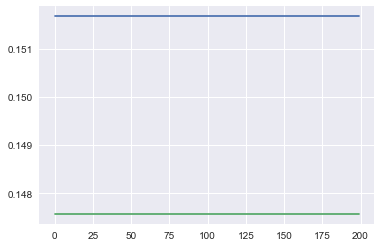

In [229]:
plt.plot([_ for _ in range(len(cmma))],cmma)
plt.plot([_ for _ in range(len(mmb))],mmb)

In [218]:
print(factor_mmb_cmma)

╒══════════════════════╤══════════════════╤══════════════════════════════════════════╕
│ money_market_bonus   │ collateral_mma   │   phi(money_market_bonus,collateral_mma) │
╞══════════════════════╪══════════════════╪══════════════════════════════════════════╡
│ money_market_bonus_0 │ collateral_mma_0 │                                   0.9049 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_0 │ collateral_mma_1 │                                   0.0799 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_1 │ collateral_mma_0 │                                   0.0751 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_1 │ collateral_mma_1 │                                   0.0953 │
╘══════════════════════╧══════════════════╧══════════════════════════════════════════╛


In [220]:
print(belief_nopriors['collateral_mma'].values[1])

0.151670177466


In [216]:
print(belief_nopriors['money_market_bonus'])

╒══════════════════════╤═══════════════════════════╕
│ money_market_bonus   │   phi(money_market_bonus) │
╞══════════════════════╪═══════════════════════════╡
│ money_market_bonus_0 │                    0.8524 │
├──────────────────────┼───────────────────────────┤
│ money_market_bonus_1 │                    0.1476 │
╘══════════════════════╧═══════════════════════════╛


In [875]:

esp_eligible_products = ['Money Market Bonus','Collateral MMA'
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']
# le week_n_one_time set, return individual probabilities of 
#     prob_checking, prob_cmma, prob_mmb, prob_cm, prob_fx, prob_loc, prob_es
#     start_time = time.time()
#     prob_mmb = []
#     prob_cmma = []
#     prob_cm = []
#     prob_fx = []
#     prob_loc = []
#     prob_es = []
#     prob_checking = []
def ESP_Markov_Model_Joint_Prob(esp_money_market_jointprob_probabilities,week_n_one_time= None,
                                      product_name = None,range_of_weeks=24,evidence_=None,single=True):
    """Returns the probability of having a given ESP product during a certain month.. 
    If no month_n is given, then will return distributions of each product per month for 24 months. 
    Otherwise, will only products for that month.
    If no product_name is given, then will return all products for a given month. Or, that particular product."""
    
    
    #WIth a sing
    prob_checking_original = []
    start_time = time.time()
    prob_mmb = []
    prob_cmma = []
    prob_cm = []
    prob_fx = []
    prob_loc = []
    prob_es = []
    prob_checking = []
    prob_given_month_no_priors_having_product = {}
    products =['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd']
    
    model = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep'),
                    ('collateral_mma','cash_management'),('collateral_mma', 'fx_products'),('collateral_mma', 'letters_of_credit'),
                        ('collateral_mma', 'enterprise_sweep'),('collateral_mma', 'checking_usd'),('cash_management', 'fx_products'),
                        ('cash_management', 'fx_products'),('cash_management', 'letters_of_credit'),('cash_management', 'enterprise_sweep'),
                        ('cash_management', 'checking_usd'),('fx_products', 'letters_of_credit'),('fx_products', 'enterprise_sweep'),
                         ('fx_products', 'checking_usd'),('letters_of_credit', 'enterprise_sweep'),('letters_of_credit', 'checking_usd'),
                         ('enterprise_sweep', 'checking_usd')])
    
    model_mmb = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep')])
    model_cmma = MarkovModel([('collateral_mma','cash_management'),('collateral_mma', 'fx_products'),
                              ('collateral_mma', 'letters_of_credit'),
                        ('collateral_mma', 'enterprise_sweep'),('collateral_mma', 'checking_usd'),
                              ('money_market_bonus', 'collateral_mma')])
    model_cm = MarkovModel([('cash_management', 'fx_products'),('cash_management', 'letters_of_credit'),
                            ('cash_management', 'enterprise_sweep'),
                        ('cash_management', 'checking_usd'),('collateral_mma','cash_management'),('money_market_bonus', 'cash_management')])
    model_checking = MarkovModel([('cash_management', 'checking_usd'),('collateral_mma', 'checking_usd'),('money_market_bonus', 'checking_usd'),
                                 ('collateral_mma', 'checking_usd'),('letters_of_credit', 'checking_usd'),('enterprise_sweep', 'checking_usd'),
                                 ('fx_products', 'checking_usd')])
    model_fx = MarkovModel([('fx_products', 'letters_of_credit'),('fx_products', 'enterprise_sweep'),
                         ('fx_products', 'checking_usd'),('cash_management', 'fx_products'),('collateral_mma', 'fx_products'),
                           ('money_market_bonus', 'fx_products')])
    model_loc = MarkovModel([('letters_of_credit', 'enterprise_sweep'),('letters_of_credit', 'checking_usd'),('fx_products', 'letters_of_credit'),
                             ('cash_management', 'letters_of_credit'),('collateral_mma', 'letters_of_credit'), ('money_market_bonus', 'letters_of_credit') ])
    model_es = MarkovModel([('enterprise_sweep', 'checking_usd'),('letters_of_credit', 'enterprise_sweep'),('fx_products', 'enterprise_sweep'),
                           ('cash_management', 'enterprise_sweep'),('collateral_mma', 'enterprise_sweep'),('money_market_bonus', 'enterprise_sweep')])
    
    def markov_inference(dict_of_esp_jointprob):
        factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_cmma0'], dict_of_esp_jointprob['mmb0_cmma1'],
                                    dict_of_esp_jointprob['mmb1_cmma0'], dict_of_esp_jointprob['mmb1_cmma1']])
        factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['mmb0_cm0'], dict_of_esp_jointprob['mmb0_cm1'],
                                    dict_of_esp_jointprob['mmb1_cm0'], dict_of_esp_jointprob['mmb1_cm1']])
        factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_fx0'], dict_of_esp_jointprob['mmb0_fx1'],
                                    dict_of_esp_jointprob['mmb1_fx0'], dict_of_esp_jointprob['mmb1_fx1']])
        factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_loc0'], dict_of_esp_jointprob['mmb0_loc1'],
                                    dict_of_esp_jointprob['mmb1_loc0'], dict_of_esp_jointprob['mmb1_loc1']])
        factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_es0'], dict_of_esp_jointprob['mmb0_es1'],
                                    dict_of_esp_jointprob['mmb1_es0'], dict_of_esp_jointprob['mmb1_es1']])  
        factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_checking0'], dict_of_esp_jointprob['mmb0_checking1'],
                                    dict_of_esp_jointprob['mmb1_checking0'], dict_of_esp_jointprob['mmb1_checking1']])   
        # collateral mma

        factor_cmma_cm = Factor(variables=['collateral_mma','cash_management'],
                            cardinality=[2, 2],
                        values=[dict_of_esp_jointprob['cmma0_cm0'], dict_of_esp_jointprob['cmma0_cm1'],
                                dict_of_esp_jointprob['cmma1_cm0'], dict_of_esp_jointprob['cmma1_cm1']])

        factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['cmma0_fx0'], dict_of_esp_jointprob['cmma0_fx1'],
                                    dict_of_esp_jointprob['cmma1_fx0'], dict_of_esp_jointprob['cmma1_fx1']])
        factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_loc0'], dict_of_esp_jointprob['cmma0_loc1'],
                                    dict_of_esp_jointprob['cmma1_loc0'], dict_of_esp_jointprob['cmma1_loc1']])
        factor_cmma_es= Factor(variables=['collateral_mma', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_es0'], dict_of_esp_jointprob['cmma0_es1'],
                                    dict_of_esp_jointprob['cmma1_es0'], dict_of_esp_jointprob['cmma1_es1']])
        factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_checking0'], dict_of_esp_jointprob['cmma0_checking1'],
                                    dict_of_esp_jointprob['cmma1_checking0'],dict_of_esp_jointprob['cmma1_checking1']])  
        # cash management
        factor_cm_fx = Factor(variables=['cash_management', 'fx_products'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['cm0_fx0'], dict_of_esp_jointprob['cm0_fx1'],
                                    dict_of_esp_jointprob['cm1_fx0'], dict_of_esp_jointprob['cm1_fx1']])
        factor_cm_loc = Factor(variables=['cash_management', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_loc0'], dict_of_esp_jointprob['cm0_loc1'],
                                    dict_of_esp_jointprob['cm1_loc0'], dict_of_esp_jointprob['cm1_loc1']])
        factor_cm_es= Factor(variables=['cash_management', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_es0'], dict_of_esp_jointprob['cm0_es1'],
                                    dict_of_esp_jointprob['cm1_es0'], dict_of_esp_jointprob['cm1_es1']])
        factor_cm_checking = Factor(variables=['cash_management', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_checking0'], dict_of_esp_jointprob['cm0_checking1'],
                                    dict_of_esp_jointprob['cm1_checking0'], dict_of_esp_jointprob['cm1_checking1']])  

        # FX products
        factor_fx_loc = Factor(variables=['fx_products', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_loc0'], dict_of_esp_jointprob['fx0_loc1'],
                                    dict_of_esp_jointprob['fx1_loc0'], dict_of_esp_jointprob['fx1_loc1']])
        factor_fx_es= Factor(variables=['fx_products', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_es0'], dict_of_esp_jointprob['fx0_es1'],
                                    dict_of_esp_jointprob['fx1_es0'], dict_of_esp_jointprob['fx1_es1']])
        factor_fx_checking = Factor(variables=['fx_products', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_checking0'], dict_of_esp_jointprob['fx0_checking1'],
                                    dict_of_esp_jointprob['fx1_checking0'], dict_of_esp_jointprob['fx1_checking1']])  

        # letters of credit

        factor_loc_es= Factor(variables=['letters_of_credit', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['loc0_es0'], dict_of_esp_jointprob['loc0_es1'],
                                    dict_of_esp_jointprob['loc1_es0'], dict_of_esp_jointprob['loc1_es1']])
        factor_loc_checking = Factor(variables=['letters_of_credit', 'checking_usd'],
                         cardinality=[2, 2],
                         values=[dict_of_esp_jointprob['loc0_checking0'], dict_of_esp_jointprob['loc0_checking1'],
                                dict_of_esp_jointprob['loc1_checking0'], dict_of_esp_jointprob['loc1_checking1']])  
        #enterprise sweep

        factor_es_checking = Factor(variables=['enterprise_sweep', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['es0_checking0'], dict_of_esp_jointprob['es0_checking1'],
                                    dict_of_esp_jointprob['es1_checking0'], dict_of_esp_jointprob['es1_checking1']])  


#         model.add_factors(factor_mmb_cmma , factor_mmb_cm, factor_mmb_fx, factor_mmb_loc,factor_mmb_es, factor_mmb_checking,
#                           factor_cmma_cm , factor_cmma_fx, factor_cmma_loc, factor_cmma_es,factor_cmma_checking,
#              factor_cm_fx,   factor_cm_loc,    factor_cm_es,  factor_cm_checking , factor_fx_loc,
#                   factor_fx_es ,  factor_fx_checking,   factor_loc_es, factor_loc_checking , factor_es_checking )#,
        model_mmb.add_factors(factor_mmb_cmma , factor_mmb_cm, factor_mmb_fx, factor_mmb_loc,factor_mmb_es, factor_mmb_checking)
        model_cmma.add_factors(factor_cmma_cm , factor_cmma_fx, factor_cmma_loc, factor_cmma_es,factor_cmma_checking,factor_mmb_cmma )
        model_cm.add_factors(factor_cm_fx,   factor_cm_loc,    factor_cm_es,  factor_cm_checking,factor_cmma_cm,factor_mmb_cm)
        model_checking.add_factors(factor_mmb_checking,factor_cmma_checking,factor_cm_checking,factor_fx_checking,factor_loc_checking , factor_es_checking)
        model_fx.add_factors(factor_fx_es ,  factor_fx_checking,factor_fx_loc, factor_cm_fx,factor_cmma_fx,factor_mmb_fx)
        model_loc.add_factors(factor_loc_es, factor_loc_checking, factor_fx_loc,factor_cm_loc,factor_cmma_loc,factor_mmb_loc  )
        model_es.add_factors(factor_es_checking ,factor_loc_es,factor_fx_es,factor_cm_es,factor_mmb_es,factor_cmma_es)
        #print(model.markov_blanket('money_market_bonus'))
        #belief_propagation = BeliefPropagation(model)
        belief_propagation_mmb = BeliefPropagation(model_mmb)
        belief_propagation_cmma = BeliefPropagation(model_cmma)
        belief_propagation_cm = BeliefPropagation(model_cm)
        belief_propagation_checking = BeliefPropagation(model_checking)
        belief_propagation_fx = BeliefPropagation(model_fx)
        belief_propagation_loc = BeliefPropagation(model_loc)
        belief_propagation_es = BeliefPropagation(model_es)
        #var_elimination = VariableElimination(model)
        
        all_products = ['money_market_bonus','collateral_mma', 'cash_management','enterprise_sweep',
                                    'fx_products','letters_of_credit','checking_usd']
        

        # perform inference for all product except the one in the for loop
        for prod in all_products:
            if evidence_==None:
                new_evidence=evidence_

            else:
                new_evidence = {key: value for key, value in evidence_.items() 
                 if key != prod}
            belief_inference_products = str(prod)
            #print(belief_inference_products,'belief inference')
        # go through and only look at one varaible at a time for inference


            #belief = belief_propagation.query(variables=[belief_inference_products], evidence=new_evidence)
            
            belief_mmb = belief_propagation_mmb.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_cmma = belief_propagation_cmma.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_cm = belief_propagation_cm.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_checking = belief_propagation_checking.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_fx = belief_propagation_fx.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_loc = belief_propagation_loc.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_es = belief_propagation_es.query(variables=[belief_inference_products], evidence=new_evidence)
            #return belief_nopriors
            try:
                mmb = belief_mmb['money_market_bonus'].values[1]
                if mmb <0 :
                    mmb = .0000001
                elif mmb >1:
                    mmb =1
                prob_mmb.append(mmb)# one is having the product
            except:
                pass
            try:
                cmma = belief_cmma['collateral_mma'].values[1]
                if cmma <0:
                    cmma = .0000001
                elif cmma >1:
                    cmma =1
                prob_cmma.append(cmma)
            except:## don't have this product
                pass
            try:
                cm = belief_cm['cash_management'].values[1]
                if cm <0:
                    cm = .0000001
                elif cm >1:
                    cm =1
                prob_cm.append(cm)
            except:
                pass
            try:
                checking = belief_checking['checking_usd'].values[1]
                if checking <0:
                    checking = .0000001
                elif checking >1:
                    checking =1
                prob_checking.append(checking)
            except:
                pass
            try:
                fx = belief_fx['fx_products'].values[1]
                if fx <0:
                    fx = .0000001
                elif fx >1:
                    fx =1
                prob_fx.append(fx)
            except:
                pass
            try:
                loc = belief_loc['letters_of_credit'].values[1]
                if loc <0:
                    loc = .0000001
                elif loc > 1:
                    loc = 1
                prob_loc.append(loc)
            except:
                
                pass
            try:
                es = belief_es['enterprise_sweep'].values[1]
                if es<0:
                    es = .0000001
                elif es >1:
                    es = 1
                prob_es.append(es)
            except:
                pass



    if single==False:
        for week_n_loop in range(range_of_weeks):
            dict_of_esp_jointprob = esp_money_market_jointprob_probabilities(week_n_loop)
            markov_inference(dict_of_esp_jointprob)
    else:
        dict_of_esp_jointprob = esp_money_market_jointprob_probabilities(week_n_one_time)
        markov_inference(dict_of_esp_jointprob)
        # the order of the factor model is a0_b0, a0_b1, ,a1_b0, a1_b1
        #http://conference.scipy.org/proceedings/scipy2015/pdfs/ankur_ankan.pdf
        
    print(prob_checking,'checking', prob_cmma,'cmma', prob_mmb,'mmb', prob_cm,'cm', prob_fx,'fx', prob_loc,'loc',
          prob_es,'es',prob_checking_original,'checking original')
    #return prob_checking, prob_cmma, prob_mmb, prob_cm, prob_fx, prob_loc, prob_es, prob_checking_original
    return prob_checking[0], prob_cmma[0], prob_mmb[0], prob_cm[0], prob_fx[0], prob_loc[0], prob_es[0]

    end_time = time.time()
    print('{} weeks took {} seconds'.format(range_of_weeks,end_time-start_time))

        


In [804]:
.000040157 * 10_000

0.40157000000000004

In [832]:
checking, cmma, mmb , cm, fx, loc, es = ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,
                                                                    week_n_one_time=1,evidence_={'money_market_bonus':1,
                                                                                                 'collateral_mma':1,
                                                       'cash_management':1,'enterprise_sweep':1,
                                    'fx_products':1,'letters_of_credit':1,'checking_usd':1}) 

[1] checking [0.30298640470057592] cmma [1e-07] mmb [0.51651086596994622] cm [0.96204418046480766] fx [0.99965240002418021] loc [1e-07] es [] checking original


In [876]:
checking, cmma, mmb , cm, fx, loc, es = ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,
                                                                    week_n_one_time=1,
                                            evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':0,'letters_of_credit':0,'checking_usd':0}) 

[0.99923176046362727] checking [0.096166520272165004] cmma [1e-07] mmb [0.0240042787866033] cm [0.33437927272743223] fx [0.91668096236822894] loc [0.61803996529202598] es [] checking original


In [835]:
np.random.choice([1,0],p=np.array([checking,(1-checking)]))

1

In [861]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=1,
                                            evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':0,'letters_of_credit':0,'checking_usd':0}) 

[0.99923176046362727] checking [0.096166520272165004] cmma [1e-07] mmb [0.0240042787866033] cm [0.33437927272743223] fx [0.91668096236822894] loc [0.61803996529202598] es [] checking original


(0.99923176046362727,
 0.096166520272165004,
 1e-07,
 0.0240042787866033,
 0.33437927272743223,
 0.91668096236822894,
 0.61803996529202598)

In [877]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=80,
                                            evidence_={'money_market_bonus':1,'collateral_mma':1,
                                                       'cash_management':1,'enterprise_sweep':1,
                                    'fx_products':1,'letters_of_credit':1,'checking_usd':1}) 

[0.89033430790431212] checking [0.97172363458359101] cmma [0.67404681842728564] mmb [0.98241772796297855] cm [0.26600704267550296] fx [0.022167182390045139] loc [1] es [] checking original


(0.89033430790431212,
 0.97172363458359101,
 0.67404681842728564,
 0.98241772796297855,
 0.26600704267550296,
 0.022167182390045139,
 1)

In [859]:
checking, cmma, mmb, cm, fx, loc, es = ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=20)

[0.99506058230884986] checking [0.86474481381163293] cmma [0.95111761089820457] mmb [0.89636591739109384] cm [0.83450270038009144] fx [1] loc [0.04322501636968068] es [] checking original


In [677]:
1-checking

0.99995630165440064

In [678]:
# get a checking account
np.random.choice(np.array([1,0]),p=np.array([checking,(1-checking)]))

0

In [ ]:
## new probs
probs = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i) for i in range(152)]

[0.99967606227867667] checking [0.8886862920454609] cmma [0.088432511792256877] mmb [0.60588456909483157] cm [0.88232919225520423] fx [0.99804911193432266] loc [1e-07] es [] checking original
[0.99965450504964204] checking [0.88618632639156403] cmma [0.23825592397555806] mmb [0.63837005165999461] cm [0.88293823707635199] fx [0.99850696617084855] loc [1e-07] es [] checking original
[0.99962709142249229] checking [0.88383700803937093] cmma [0.33873194852480193] mmb [0.66755521793580785] cm [0.88322586909838563] fx [0.99888357229735036] loc [1e-07] es [] checking original
[0.99959294922127961] checking [0.88163328588783219] cmma [0.40962359346508298] mmb [0.69377489573994888] cm [0.88320399631520285] fx [0.99921710119602947] loc [1e-07] es [] checking original
[0.99955099773614953] checking [0.87957129430503367] cmma [0.46118071485407647] mmb [0.71734141945212204] cm [0.88288106915753073] fx [0.9995312704412731] loc [1e-07] es [] checking original
[0.99949990927276244] checking [0.8776481

In [ ]:
## FINAL - new probs
plt.figure(figsize=(12,8))
plt.plot([probs[i][0] for i in range(len(probs))],label='checking',color='black')
plt.plot([probs[i][1] for i in range(len(probs))],label='cmma',color='red')
plt.plot([probs[i][2] for i in range(len(probs))],label='mmb')
plt.plot([probs[i][3] for i in range(len(probs))],label='cm')
plt.plot([probs[i][4] for i in range(len(probs))],label='fx')
plt.plot([probs[i][5] for i in range(len(probs))],label='loc')
plt.plot([probs[i][6] for i in range(len(probs))],label='es')
#plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time no evidence')
plt.xlabel('week number')
plt.ylabel('Probability')

In [864]:
## new probs
probs_allzero = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i,
                                            evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':0,'letters_of_credit':0,'checking_usd':0}) for i in range(104)]

[0.99916163451435913] checking [0.095257778624174255] cmma [1e-07] mmb [0.021663399966307527] cm [0.27052997237324777] fx [0.91998147281422415] loc [0.5395341018145039] es [] checking original
[0.99923176046362727] checking [0.096166520272165004] cmma [1e-07] mmb [0.0240042787866033] cm [0.33437927272743223] fx [0.91668096236822894] loc [0.61803996529202598] es [] checking original
[0.99929274757480235] checking [0.097187894216258869] cmma [1e-07] mmb [0.026411048779945469] cm [0.38657625798535611] fx [0.91291750849528652] loc [0.67440694620106223] es [] checking original
[0.99934440717417883] checking [0.098321559598211955] cmma [1e-07] mmb [0.0288892272185691] cm [0.42980561900732234] fx [0.90861286084261417] loc [0.71634785382622679] es [] checking original
[0.99938636985673468] checking [0.099567606701838007] cmma [1e-07] mmb [0.031444583965255304] cm [0.46596980671994254] fx [0.90367780418261123] loc [0.74802740438027804] es [] checking original
[0.99941802601705521] checking [0.1

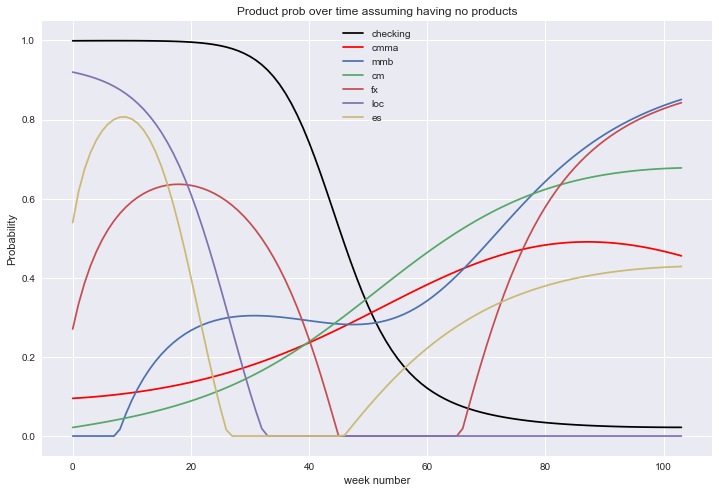

In [865]:
## FINAL
plt.figure(figsize=(12,8))
plt.plot([probs_allzero[i][0] for i in range(len(probs))],label='checking',color='black')
plt.plot([probs_allzero[i][1] for i in range(len(probs))],label='cmma',color='red')
plt.plot([probs_allzero[i][2] for i in range(len(probs))],label='mmb')
plt.plot([probs_allzero[i][3] for i in range(len(probs))],label='cm')
plt.plot([probs_allzero[i][4] for i in range(len(probs))],label='fx')
plt.plot([probs_allzero[i][5] for i in range(len(probs))],label='loc')
plt.plot([probs_allzero[i][6] for i in range(len(probs))],label='es')
#plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time assuming having no products')
plt.xlabel('week number')
plt.ylabel('Probability')

In [816]:
t = {'1':1,'2':2}

In [819]:
r = {'1':3, '2':2}

In [820]:
t==r

False

In [837]:
r =1

In [838]:
q = 1

In [836]:
t = [1,2,3,2,1]

In [839]:
for idx,i in enumerate(t):
    if r ==1:
        print('here')
        print(idx)
    if q ==1:
        print('q')
        print(idx)

here
0
q
0
here
1
q
1
here
2
q
2
here
3
q
3
here
4
q
4
